In [2]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 619.3 kB/s eta 0:00:0000:0100:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 366.3 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 392.4 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 191.6 kB/s eta 0:00:00a 0:00:02
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 486.0 kB/s eta 0:00:0000:0100:21
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812366 sha256=92e626a00e6a104f50519448c3f7527ff2232f9ec884d9a9758f172ad467cbdc
  Stored in directory: /Users/prakhargupta/Library/Caches/pip/wheels/cf/c0/b9/f147f4220fd1d9277d0981b88b35b26f03ad910fffd60013a6
Successfully built pyspark
Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install pandas

  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 2.1 MB/s eta 0:00:0000:0100:01
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)
Note: you may need to restart the kernel to use updated packages.


In [48]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [1]:
from pyspark.sql.types import StructField, StructType, IntegerType, StringType, BooleanType, DateType, DecimalType
from pyspark.sql.functions import col,sum,when,avg,row_number
from pyspark.sql.window import Window
from pyspark.sql.functions import year, month, dayofmonth, when, lower, regexp_replace,expr,current_date

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("IPL DATA ANALYSIS").getOrCreate() 

24/08/27 23:40:49 WARN Utils: Your hostname, Prakhars-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 192.168.117.105 instead (on interface en0)
24/08/27 23:40:49 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/08/27 23:40:49 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
spark

In [4]:
ball_by_ball_schema = StructType([
    StructField("match_id", IntegerType(), True),
    StructField("over_id", IntegerType(), True),
    StructField("ball_id", IntegerType(), True),
    StructField("innings_no", IntegerType(), True),
    StructField("team_batting", StringType(), True),
    StructField("team_bowling", StringType(), True),
    StructField("striker_batting_position", IntegerType(), True),
    StructField("extra_type", StringType(), True),
    StructField("runs_scored", IntegerType(), True),
    StructField("extra_runs", IntegerType(), True),
    StructField("wides", IntegerType(), True),
    StructField("legbyes", IntegerType(), True),
    StructField("byes", IntegerType(), True),
    StructField("noballs", IntegerType(), True),
    StructField("penalty", IntegerType(), True),
    StructField("bowler_extras", IntegerType(), True),
    StructField("out_type", StringType(), True),
    StructField("caught", BooleanType(), True),
    StructField("bowled", BooleanType(), True),
    StructField("run_out", BooleanType(), True),
    StructField("lbw", BooleanType(), True),
    StructField("retired_hurt", BooleanType(), True),
    StructField("stumped", BooleanType(), True),
    StructField("caught_and_bowled", BooleanType(), True),
    StructField("hit_wicket", BooleanType(), True),
    StructField("obstructingfeild", BooleanType(), True),
    StructField("bowler_wicket", BooleanType(), True),
    StructField("match_date", DateType(), True),
    StructField("season", IntegerType(), True),
    StructField("striker", IntegerType(), True),
    StructField("non_striker", IntegerType(), True),
    StructField("bowler", IntegerType(), True),
    StructField("player_out", IntegerType(), True),
    StructField("fielders", IntegerType(), True),
    StructField("striker_match_sk", IntegerType(), True),
    StructField("strikersk", IntegerType(), True),
    StructField("nonstriker_match_sk", IntegerType(), True),
    StructField("nonstriker_sk", IntegerType(), True),
    StructField("fielder_match_sk", IntegerType(), True),
    StructField("fielder_sk", IntegerType(), True),
    StructField("bowler_match_sk", IntegerType(), True),
    StructField("bowler_sk", IntegerType(), True),
    StructField("playerout_match_sk", IntegerType(), True),
    StructField("battingteam_sk", IntegerType(), True),
    StructField("bowlingteam_sk", IntegerType(), True),
    StructField("keeper_catch", BooleanType(), True),
    StructField("player_out_sk", IntegerType(), True),
    StructField("matchdatesk", DateType(), True)
])

In [5]:
ball_by_ball_df = spark.read.schema(ball_by_ball_schema).format("csv").option("header","true").load("Ball_By_Ball.csv")

In [6]:
match_schema = StructType([
    StructField("match_sk", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("team1", StringType(), True),
    StructField("team2", StringType(), True),
    StructField("match_date", DateType(), True),
    StructField("season_year", IntegerType(), True),  # Assuming 'year' is represented as an integer
    StructField("venue_name", StringType(), True),
    StructField("city_name", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("toss_winner", StringType(), True),
    StructField("match_winner", StringType(), True),
    StructField("toss_name", StringType(), True),
    StructField("win_type", StringType(), True),
    StructField("outcome_type", StringType(), True),
    StructField("manofmach", StringType(), True),  # Assuming 'manofmach' is the abbreviation for 'man of the match'
    StructField("win_margin", IntegerType(), True),
    StructField("country_id", IntegerType(), True)
])

In [7]:
match_df = spark.read.schema(match_schema).format("csv").option("header","true").load("Match.csv")

In [8]:
player_schema = StructType([
    StructField("player_sk", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True)
])

In [9]:
player_df = spark.read.schema(player_schema).format("csv").option("header","true").load("Player.csv")

In [10]:
player_match_schema = StructType([
    StructField("player_match_sk", IntegerType(), True),
    StructField("playermatch_key", DecimalType(10, 0), True),  # Adjust precision and scale as needed
    StructField("match_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("role_desc", StringType(), True),
    StructField("player_team", StringType(), True),
    StructField("opposit_team", StringType(), True),
    StructField("season_year", IntegerType(), True),  # Assuming 'year' is represented as an integer
    StructField("is_manofthematch", BooleanType(), True),
    StructField("age_as_on_match", IntegerType(), True),
    StructField("isplayers_team_won", BooleanType(), True),
    StructField("batting_status", StringType(), True),
    StructField("bowling_status", StringType(), True),
    StructField("player_captain", StringType(), True),
    StructField("opposit_captain", StringType(), True),
    StructField("player_keeper", StringType(), True),
    StructField("opposit_keeper", StringType(), True)
])

In [11]:
player_match_df = spark.read.schema(player_match_schema).format("csv").option("header","true").load("Player_match.csv")

In [12]:
team_schema = StructType([
    StructField("team_sk", IntegerType(), True),
    StructField("team_id", IntegerType(), True),
    StructField("team_name", StringType(), True)
])

In [13]:
team_df = spark.read.schema(team_schema).format("csv").option("header","true").load("Team.csv")

In [14]:
#Creating filter to include only valid deliveries(excluding wides and no balls)
ball_by_ball_df = ball_by_ball_df.filter((col("wides")==0) & (col("noballs")==0))


In [15]:
#calculating total and average runs scored in each match
total_and_avg_runs = ball_by_ball_df.groupBy("match_id","innings_no").agg(
    sum("runs_scored").alias("total_runs"),
    avg("runs_scored").alias("average_runs")
)

In [16]:
# total_and_avg_runs.toPandas()

In [17]:
#calculating running total of runs in each match for each over
windowSpec = Window.partitionBy("match_id","innings_no").orderBy("over_id")

ball_by_ball_df = ball_by_ball_df.withColumn(
    "running_total_runs",
    sum("runs_scored").over(windowSpec)
)

In [18]:
#Conditional columns, flag for high impact balls that is either wicket or more than 6 runs
ball_by_ball_df = ball_by_ball_df.withColumn(
    "high_impact",
    when((col("runs_scored") + col("extra_runs") > 6) | (col("bowler_wicket")==True),True).otherwise(False) 
)

In [19]:
#Extracting year, month, and day from the match date for more detailed time-based analysis
match_df = match_df.withColumn("year", year("match_date"))
match_df = match_df.withColumn("month", month("match_date"))
match_df = match_df.withColumn("day", dayofmonth("match_date"))

In [20]:
#creating Win Margin column for analysis

match_df = match_df.withColumn(
    "win_margin_category",
    when(col("win_margin") >= 100, "High")
    .when((col("win_margin") >= 50) & (col("win_margin") < 100), "Medium")
    .otherwise("Low")
)

In [21]:
#analysing the match and impact of the toss

match_df = match_df.withColumn(
    "toss_match_winner",
    when(col("toss_winner")==col("match_winner"),"Yes").otherwise("No")
)

In [22]:
#sanitising names and filling blanks fields with unknown
player_df = player_df.withColumn("player_name",lower(regexp_replace("player_name", "[^a-zA-z0-9 ]","")))
player_df = player_df.na.fill({"batting_hand": "unknown", "bowling_skill": "unknown"})

In [23]:
#now categorizing left and right hand batsman
player_df = player_df.withColumn(
    "batting_style",
    when(col("batting_hand").contains("left"),"Left-Handed").otherwise("Right-Handed")
)

In [24]:
player_df.show(2)

+---------+---------+-----------+----+--------------+----------------+------------+-------------+
|player_sk|player_id|player_name| dob|  batting_hand|   bowling_skill|country_name|batting_style|
+---------+---------+-----------+----+--------------+----------------+------------+-------------+
|        0|        1| sc ganguly|NULL| Left-hand bat|Right-arm medium|       India| Right-Handed|
|        1|        2|bb mccullum|NULL|Right-hand bat|Right-arm medium| New Zealand| Right-Handed|
+---------+---------+-----------+----+--------------+----------------+------------+-------------+
only showing top 2 rows



In [25]:
player_match_df = player_match_df.withColumn(
    "veteran_status",
    when(col("age_as_on_match") >=35, "Veteran").otherwise("Non-Veteran")
)

# player_match_df = player_match_df.filter(col("batting_status") != "Did Not Bat")

player_match_df = player_match_df.withColumn(
    "years_since_debut",
    (year(current_date())-col("season_year"))
)

In [26]:
player_match_df.columns

['player_match_sk',
 'playermatch_key',
 'match_id',
 'player_id',
 'player_name',
 'dob',
 'batting_hand',
 'bowling_skill',
 'country_name',
 'role_desc',
 'player_team',
 'opposit_team',
 'season_year',
 'is_manofthematch',
 'age_as_on_match',
 'isplayers_team_won',
 'batting_status',
 'bowling_status',
 'player_captain',
 'opposit_captain',
 'player_keeper',
 'opposit_keeper',
 'veteran_status',
 'years_since_debut']

In [27]:
ball_by_ball_df.createOrReplaceTempView("ball_by_ball")
player_match_df.createOrReplaceTempView("player_match")
player_df.createOrReplaceTempView("player")
team_df.createOrReplaceTempView("team")
match_df.createOrReplaceTempView("match")

24/08/27 23:40:53 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [28]:
top_scoring_batsman_per_season = spark.sql("""
SELECT
p.player_name,
m.season_year,
SUM(b.runs_scored) AS total_runs
FROM ball_by_ball b                                         
JOIN match m ON b.match_id = m.match_id
JOIN player_match pm ON m.match_id = pm.match_id AND b.striker = pm.player_id
JOIN player p ON p.player_id = pm.player_id
GROUP BY p.player_name, m.season_year
ORDER BY m.season_year, total_runs DESC
""")

In [29]:
# top_scoring_batsman_per_season.toPandas()

In [30]:
economical_bowlers_powerplay = spark.sql("""
SELECT p.player_name,
AVG(b.runs_scored) AS avg_runs_per_ball,
COUNT(b.bowler_wicket) AS total_wickets
FROM ball_by_ball b
JOIN player_match pm on b.match_id = pm.match_id AND b.bowler = pm.player_id
JOIN player p ON pm.player_id = p.player_id
where b.over_id<=6
GROUP BY p.player_name
HAVING COUNT(*) >= 1
ORDER BY avg_runs_per_ball, total_wickets desc                                        
                                         
                                         
"""
)

In [31]:
economical_bowlers_powerplay.show(5)

+-----------+------------------+-------------+
|player_name| avg_runs_per_ball|total_wickets|
+-----------+------------------+-------------+
| sm harwood|0.3333333333333333|            0|
| ankit soni|               0.5|            0|
|  gr napier|               0.5|            0|
|   aj finch|               0.5|            0|
|    a zampa|               0.5|            0|
+-----------+------------------+-------------+
only showing top 5 rows



In [32]:
toss_impact_individual_matches = spark.sql("""
SELECT m.match_id, m.toss_winner,m.toss_name,m.match_winner,
        CASE when m.toss_winner = m.match_winner THEN 'WON' ELSE 'Lost' END AS match_outcome 
FROM match m
where m.toss_name IS NOT NULL
ORDER BY m.match_id                                                                          
""")

In [33]:
toss_impact_individual_matches.show()

+--------+--------------------+---------+--------------------+-------------+
|match_id|         toss_winner|toss_name|        match_winner|match_outcome|
+--------+--------------------+---------+--------------------+-------------+
|  335987|Royal Challengers...|    field|Kolkata Knight Ri...|         Lost|
|  335988| Chennai Super Kings|      bat| Chennai Super Kings|          WON|
|  335989|    Rajasthan Royals|      bat|    Delhi Daredevils|         Lost|
|  335990|      Mumbai Indians|      bat|Royal Challengers...|         Lost|
|  335991|     Deccan Chargers|      bat|Kolkata Knight Ri...|         Lost|
|  335992|     Kings XI Punjab|      bat|    Rajasthan Royals|         Lost|
|  335993|     Deccan Chargers|      bat|    Delhi Daredevils|         Lost|
|  335994|      Mumbai Indians|    field| Chennai Super Kings|         Lost|
|  335995|    Rajasthan Royals|    field|    Rajasthan Royals|          WON|
|  335996|      Mumbai Indians|    field|     Kings XI Punjab|         Lost|

In [34]:
average_runs_in_wins = spark.sql("""
SELECT p.player_name, AVG(b.runs_scored) AS avg_runs_in_wins, COUNT(*) AS innings_played FROM ball_by_ball b
JOIN player_match pm ON b.match_id= pm.match_id AND b.striker = pm.player_id
JOIN player p ON pm.player_id = p.player_id
JOIN match m ON pm.match_id = m.match_id
WHERE m.match_winner = pm.player_team
GROUP BY p.player_name
ORDER BY avg_runs_in_wins DESC
""")

In [35]:
# # Assuming `average_runs_in_wins` is your DataFrame
# average_runs_in_wins.write.format("csv").option("header", "true").save("/dbfs/tmp/average_runs_in_wins.csv")


In [36]:
average_runs_in_wins.show(5)

+-------------+------------------+--------------+
|  player_name|  avg_runs_in_wins|innings_played|
+-------------+------------------+--------------+
|  rashid khan|               6.0|             1|
|shahid afridi|3.3333333333333335|             6|
|     an ahmed|               3.0|             3|
|     ba bhatt|               3.0|             2|
|      sn khan|2.5789473684210527|            19|
+-------------+------------------+--------------+
only showing top 5 rows



In [37]:
import matplotlib.pyplot as plt
from IPython.display import display

In [38]:
spark.conf.set("spark.hadoop.fs.s3a.endpoint", "s3.amazonaws.com")

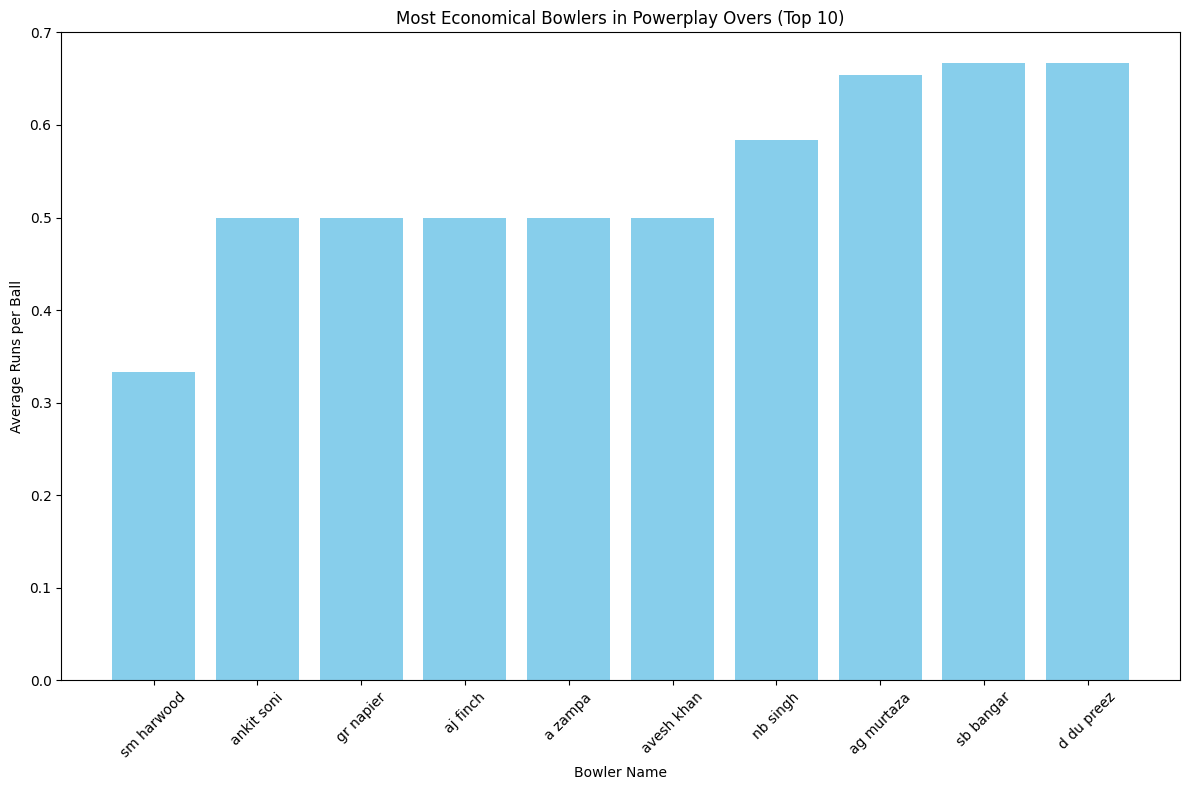

In [39]:
#Assuming 'economical_bowlers_powerplay' is already executed and available as a Spark DataFrame
economical_bowlers_pd = economical_bowlers_powerplay.toPandas()
#Visualizing using Matplotlib
plt.figure(figsize=(12, 8))
#Limiting to top 10 for clarity in the plot
top_economical_bowlers = economical_bowlers_pd.nsmallest(10, 'avg_runs_per_ball')
plt.bar(top_economical_bowlers ['player_name'], top_economical_bowlers['avg_runs_per_ball'], color='skyblue')
plt.xlabel('Bowler Name')
plt.ylabel('Average Runs per Ball')
plt.title('Most Economical Bowlers in Powerplay Overs (Top 10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [40]:
import seaborn as sns

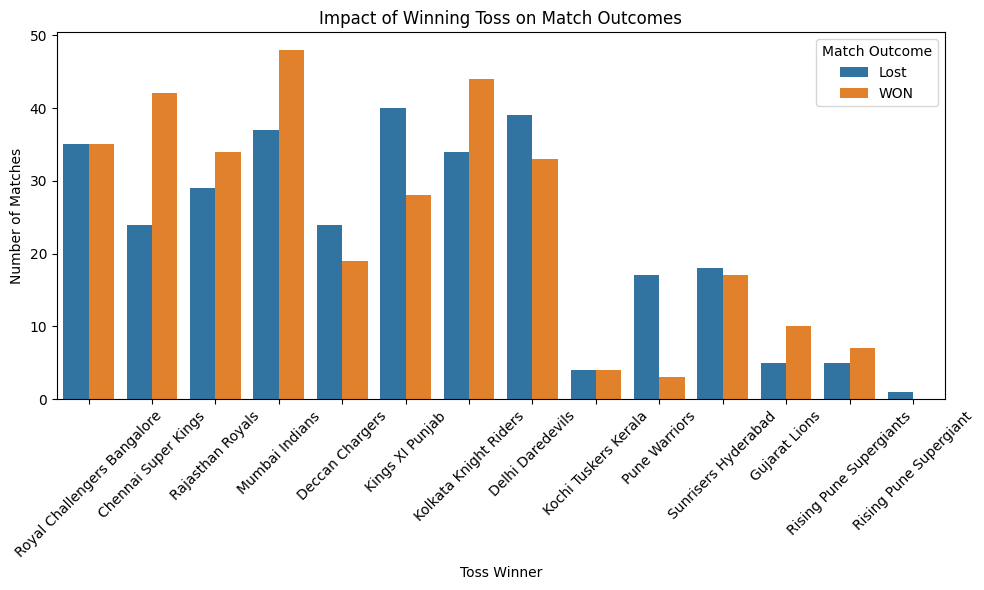

In [41]:
toss_impact_pd = toss_impact_individual_matches.toPandas()
# Creating a countplot to show win/loss after winning toss
plt.figure(figsize=(10, 6))
sns.countplot(x='toss_winner', hue='match_outcome', data=toss_impact_pd)
plt.title('Impact of Winning Toss on Match Outcomes')
plt.xlabel('Toss Winner')
plt.ylabel('Number of Matches')
plt.legend(title='Match Outcome')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#when a team wins, its impact on winning or loosing a match

/var/folders/7c/mv0lv6l17g51y1xvnynwg6_r0000gn/T/ipykernel_41261/933160693.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='player_name', y='avg_runs_in_wins', data=top_scorers, palette='viridis')


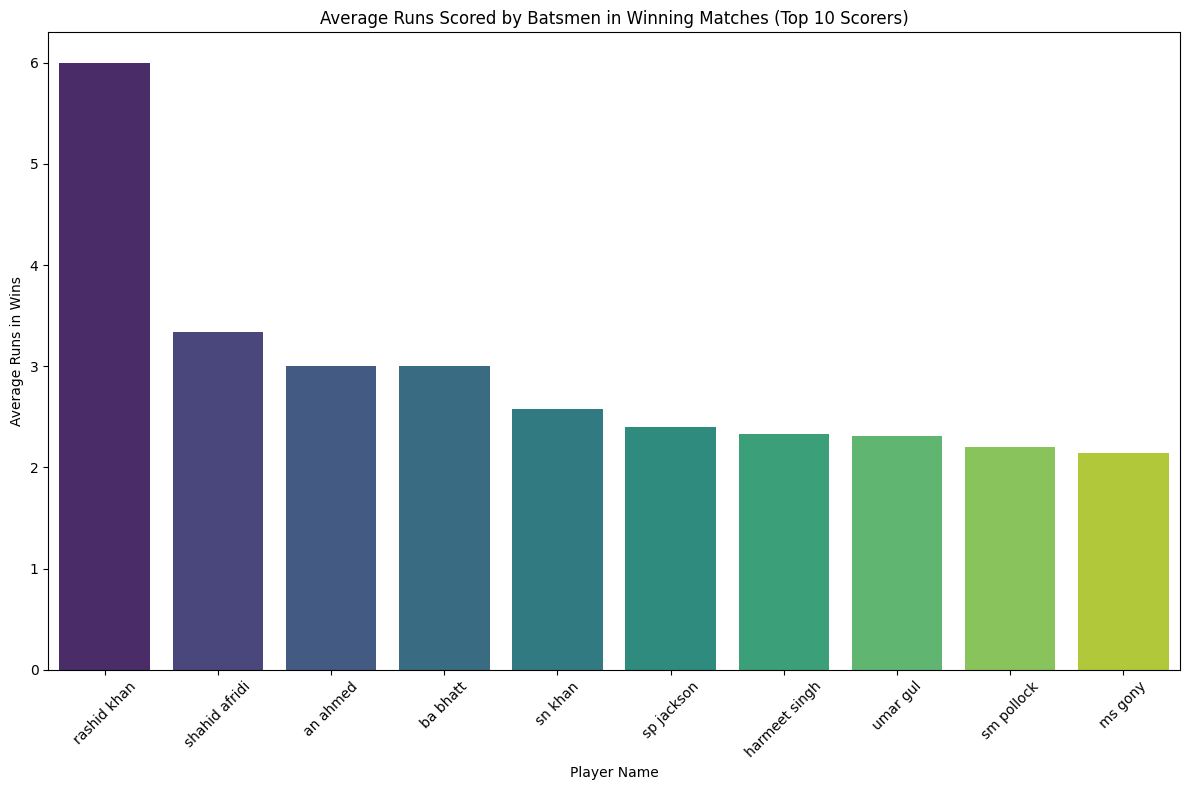

In [43]:
average_runs_pd = average_runs_in_wins.toPandas()
# Using seaborn to plot average runs in winning matches
plt.figure(figsize=(12, 8))
top_scorers = average_runs_pd.nlargest(10, 'avg_runs_in_wins')
sns.barplot(x='player_name', y='avg_runs_in_wins', data=top_scorers, palette='viridis')
plt.title('Average Runs Scored by Batsmen in Winning Matches (Top 10 Scorers)')
plt.xlabel('Player Name')
plt.ylabel('Average Runs in Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [45]:
scores_by_venue = spark.sql("""
SELECT venue_name, AVG(total_runs) AS average_score, MAX(total_runs) AS highest_score
FROM (
    SELECT ball_by_ball.match_id, match.venue_name, SUM(runs_scored) AS total_runs
    FROM ball_by_ball
    JOIN match ON ball_by_ball.match_id = match.match_id
    GROUP BY ball_by_ball.match_id, match.venue_name
)
GROUP BY venue_name
ORDER BY average_score DESC
""")

/var/folders/7c/mv0lv6l17g51y1xvnynwg6_r0000gn/T/ipykernel_41261/2188126793.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average_score', y='venue_name', data=scores_by_venue_pd, palette='pastel')


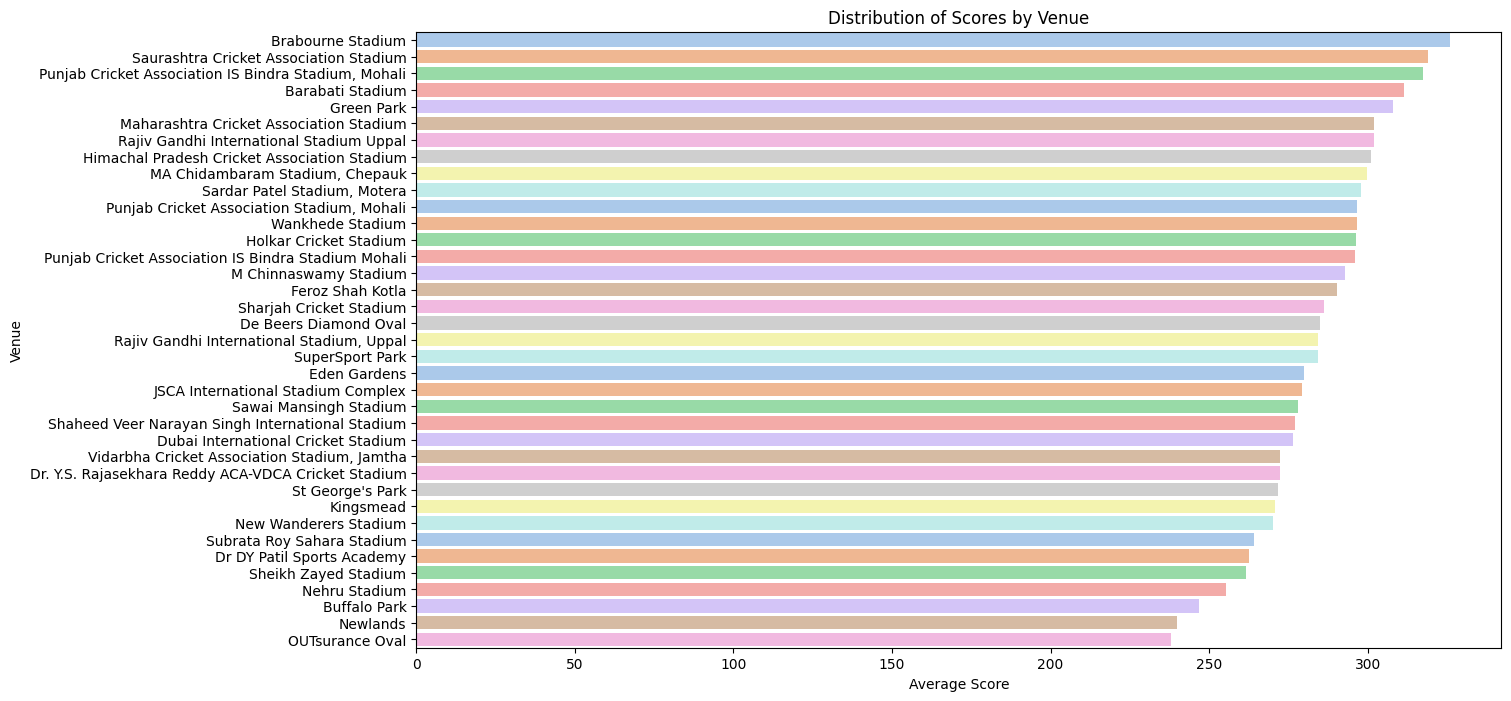

In [52]:
scores_by_venue_pd = scores_by_venue.toPandas()
# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='average_score', y='venue_name', data=scores_by_venue_pd, palette='pastel')
plt.title('Distribution of Scores by Venue')
plt.xlabel('Average Score')
plt.ylabel('Venue')
plt.show()

In [51]:
dismissal_types = spark.sql("""
SELECT out_type, COUNT(*) AS frequency FROM ball_by_ball
WHERE out_type IS NOT NULL
GROUP BY out_type
ORDER BY frequency DESC
""")

/var/folders/7c/mv0lv6l17g51y1xvnynwg6_r0000gn/T/ipykernel_41261/2534103849.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='out_type', data=dismissal_types_pd, palette='pastel')


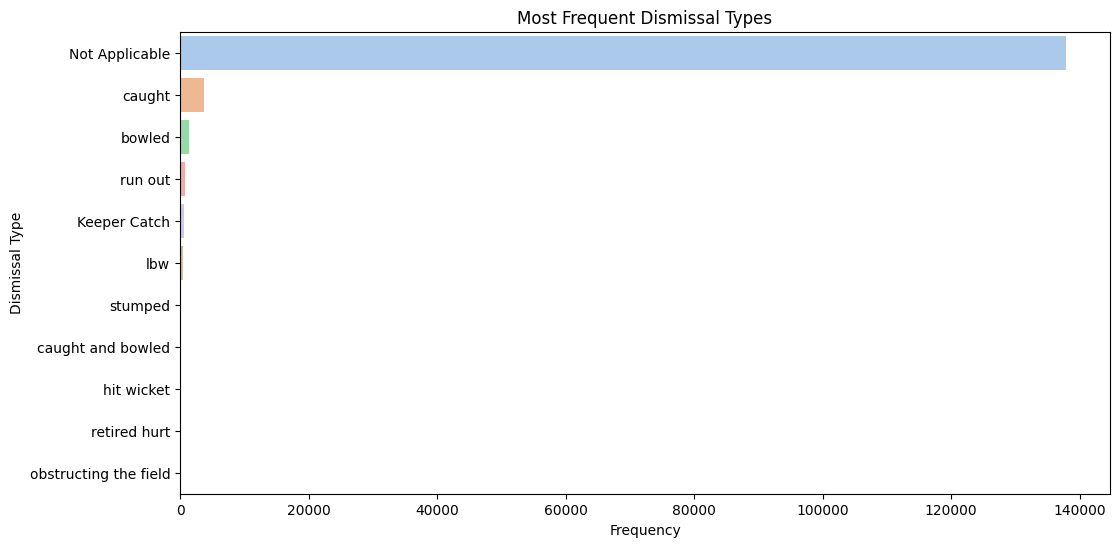

In [54]:
dismissal_types_pd = dismissal_types.toPandas()
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='frequency', y='out_type', data=dismissal_types_pd, palette='pastel')
plt.title('Most Frequent Dismissal Types')
plt.xlabel('Frequency')
plt.ylabel('Dismissal Type')
plt.show()

In [59]:
team_toss_win_performance=spark.sql("""
SELECT team1, COUNT(*) AS matches_played, SUM(CASE WHEN toss_winner = match_winner THEN 1 ELSE 0 END) AS wins_after_toss
    FROM match
        WHERE toss_winner=team1
        GROUP BY team1
ORDER BY wins_after_toss DESC
""")

/var/folders/7c/mv0lv6l17g51y1xvnynwg6_r0000gn/T/ipykernel_41261/4247016268.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='wins_after_toss', y='team1', data=team_toss_win_pd, palette='pastel')


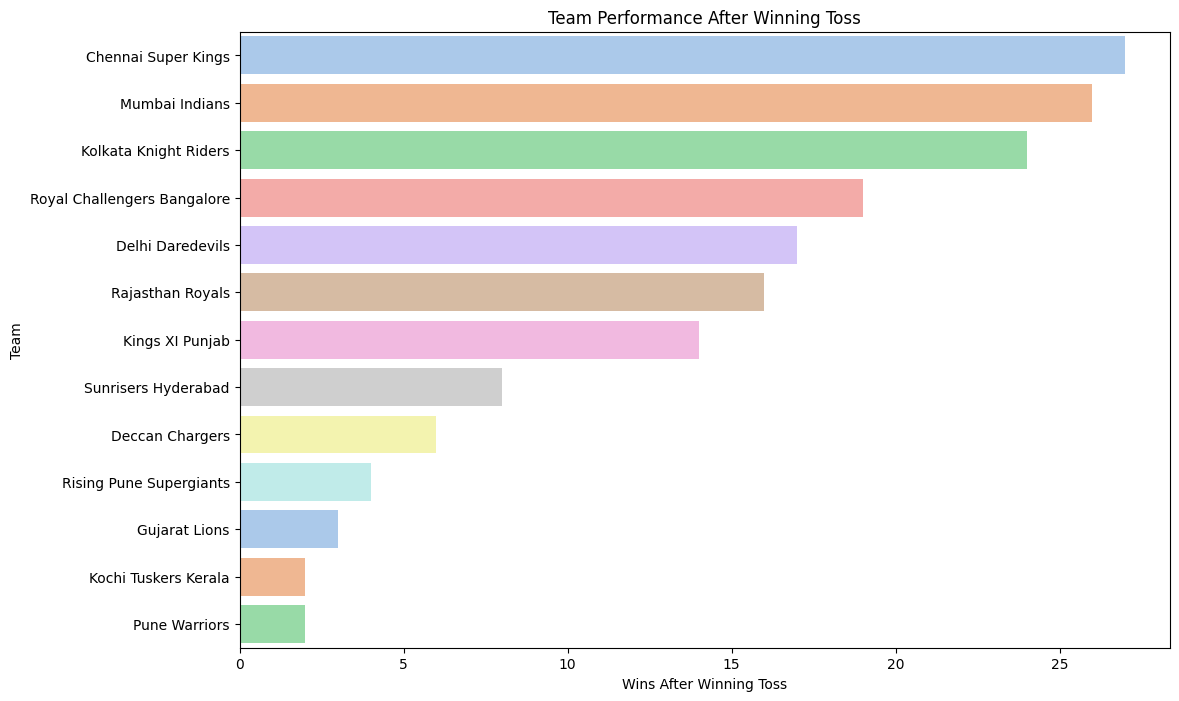

In [61]:
team_toss_win_pd = team_toss_win_performance.toPandas()
# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='wins_after_toss', y='team1', data=team_toss_win_pd, palette='pastel')
plt.title('Team Performance After Winning Toss')
plt.xlabel('Wins After Winning Toss')
plt.ylabel('Team')
plt.show()